In [41]:
import numpy as np 
import pandas as pd
import re
import spacy
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import string
import io
import seaborn as sns

In [ ]:
#File upload to Colabs
from google.colab import files
uploaded = files.upload()

In [ ]:
#Dataframe from the csv file uploaded
df = pd.read_csv(io.BytesIO(uploaded['tripadvisor_hotel_reviews.csv']))
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [ ]:
#Stats not very relevant as Classification Problem. Mean is close to 4.
df.describe()

,Rating
count,20491.000000
mean,3.952223
std,1.233030
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [ ]:
df.isnull().mean()
#No data Missing

Review    0.0
Rating    0.0
dtype: float64

In [ ]:
df['Rating'].unique()
#Five Labels for Classification

array([4, 2, 3, 5, 1])

In [ ]:
#checking counts for each label
df['Rating'].value_counts()
#Maximum is 5 Min is 1

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

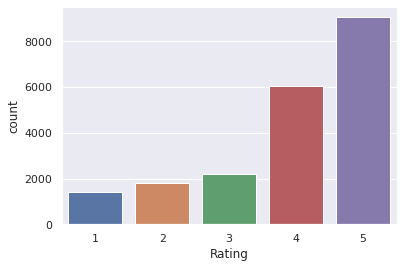

In [ ]:
#Plotting Class labels on a Graph
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Rating", data=df)


In [ ]:
df.loc[df['Rating'] == 1].head(2)

,Review,Rating
15,horrible customer service hotel stay february ...,1
32,"noise airconditioner-a standard, arranged stay...",1


In [ ]:
df.loc[df['Rating'] == 2].head(2)

,Review,Rating
1,ok nothing special charge diamond member hilto...,2
10,"poor value stayed monaco seattle july, nice ho...",2


In [ ]:
df.loc[df['Rating'] == 3].head(2)

,Review,Rating
2,nice rooms not 4* experience hotel monaco seat...,3
13,nice hotel not nice staff hotel lovely staff q...,3


In [ ]:
df.loc[df['Rating'] == 4].head(2)

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
7,"excellent staff, housekeeping quality hotel ch...",4


In [ ]:
df.loc[df['Rating'] == 5].head(2)

,Review,Rating
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [ ]:
#Creating a copy with Features and class labels as separate Dataset
x_Main = df['Review'].copy()
y_Main = df['Rating'].copy()

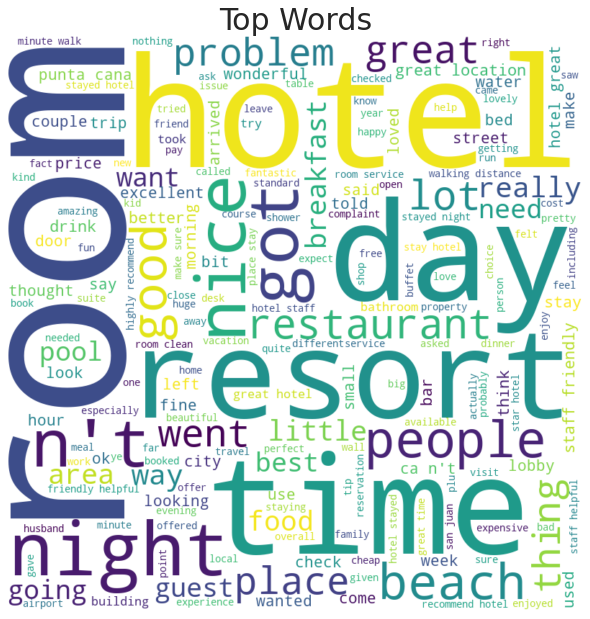

In [ ]:
#Word Cloud generator for Reviews

data = df['Review']
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 12).generate(" ".join(data.values))                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("Top Words",fontsize=30)
plt.show()

In [ ]:
import tensorflow_hub as hub
import keras
from keras.models import Sequential
from tensorflow.keras import layers
import tensorflow.compat.v1 as tf

x_Reshaped = np.reshape(x_Main,20491)

#Pre-trained text embedding

embed = hub.load("https://tfhub.dev/google/nnlm-en-dim128/2")
x_New = embed(x_Reshaped)
#x_Features = pd.DataFrame(x_New)



In [ ]:
print(x_New.shape, x_New.dtype)

(20491, 128) <dtype: 'float32'>


In [ ]:
y_Labels = y_Main.copy()
print(y_Labels.shape, y_Labels.dtype)

(20491,) int64


In [ ]:
print(x_New)

tf.Tensor(
[[ 0.20585984  0.18637095 -0.15752402 ... -0.0944639   0.5119964
  -0.01507805]
 [ 0.24491759  0.6142323  -0.15370035 ... -0.30324394  0.6917187
  -0.1235842 ]
 [ 0.02124509  0.52650404 -0.2957632  ... -0.38237888  0.7460834
  -0.1734074 ]
 ...
 [ 0.06914312  0.29563522 -0.17144734 ... -0.5006316   0.4049592
  -0.11970636]
 [ 0.4242196   1.065797   -0.12848337 ... -0.24944922  0.85995525
   0.14251286]
 [ 0.16960736  0.37283498 -0.05605149 ... -0.07607685  0.53097796
   0.16431849]], shape=(20491, 128), dtype=float32)


In [ ]:
x_Newnum = x_New.numpy()

In [ ]:
print(x_Newnum)

[[ 0.20585984  0.18637095 -0.15752402 ... -0.0944639   0.5119964
  -0.01507805]
 [ 0.24491759  0.6142323  -0.15370035 ... -0.30324394  0.6917187
  -0.1235842 ]
 [ 0.02124509  0.52650404 -0.2957632  ... -0.38237888  0.7460834
  -0.1734074 ]
 ...
 [ 0.06914312  0.29563522 -0.17144734 ... -0.5006316   0.4049592
  -0.11970636]
 [ 0.4242196   1.065797   -0.12848337 ... -0.24944922  0.85995525
   0.14251286]
 [ 0.16960736  0.37283498 -0.05605149 ... -0.07607685  0.53097796
   0.16431849]]


In [ ]:
x_Features = pd.DataFrame(x_Newnum)

In [ ]:
x_Features.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.205860,0.186371,-0.157524,0.156108,0.095656,-0.050985,0.249086,-0.020314,0.021824,0.349959,...,-0.123180,0.148279,-0.013220,-0.397213,0.004751,0.262515,0.004985,-0.094464,0.511996,-0.015078
1,0.244918,0.614232,-0.153700,-0.434533,0.005590,0.026822,0.273999,-0.019168,-0.255772,0.855414,...,-0.147716,0.226924,0.066579,-0.399368,0.113825,0.098914,-0.209731,-0.303244,0.691719,-0.123584
2,0.021245,0.526504,-0.295763,-0.017019,0.214639,0.040551,0.125150,-0.113674,-0.156098,0.843271,...,-0.292857,0.172671,0.245776,-0.449023,-0.108089,-0.027041,-0.146638,-0.382379,0.746083,-0.173407
3,0.107295,0.210992,0.071974,0.063926,-0.146253,0.051463,0.246974,-0.051206,-0.201408,0.363300,...,0.008886,0.138248,0.038652,-0.109283,0.040797,0.003436,-0.041692,-0.109322,0.527363,-0.171979
4,0.018079,0.581979,-0.118254,-0.075002,-0.119192,-0.024644,0.110495,0.079604,-0.253825,0.789282,...,-0.056085,0.212131,0.035114,-0.472945,0.232486,0.088558,-0.055281,-0.100096,0.600199,-0.024315


In [ ]:
from keras.models import Sequential
from sklearn.model_selection import train_test_split

X = x_Features
y = y_Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
import tensorflow as tf


tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.03),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

#history = model.fit(X_train, y_train, epochs=100)

##history = model.fit(X_train, y_train, epochs=50)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


449/449 [==============================] - 3s 5ms/step - loss: -6389102542848.0000 - accuracy: 0.0687 - precision: 1.0000 - recall: 0.9987
Epoch 2/100
449/449 [==============================] - 2s 4ms/step - loss: -242312072396800.0000 - accuracy: 0.0690 - precision: 1.0000 - recall: 1.0000
Epoch 3/100
449/449 [==============================] - 2s 5ms/step - loss: -1606574392999936.0000 - accuracy: 0.0690 - precision: 1.0000 - recall: 1.0000
Epoch 4/100
449/449 [==============================] - 2s 4ms/step - loss: -5423429687705600.0000 - accuracy: 0.0690 - precision: 1.0000 - recall: 1.0000
Epoch 5/100
449/449 [==============================] - 2s 4ms/step - loss: -13112734870667264.0000 - accuracy: 0.0690 - precision: 1.0000 - recall: 1.0000
Epoch 6/100
449/449 [==============================] - 2s 4ms/step - loss: -26018392188125184.0000 - accuracy: 0.0690 - precision: 1.0000 - recall: 1.0000
Epoch 7/100
449/449 [==============================] - 2s 4ms/step - loss: -45507055401828

In [ ]:
import tensorflow as tf

tf.random.set_seed(43)

model = tf.keras.Sequential([
     
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

history = model.fit(X_train, y_train, epochs=100)


Epoch 1/100


ValueError: ignored